# Домашнее задание 1 - предсказание задержки авиарейсов


### О задании

Практическое задание посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

### Pandas

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [4]:
import pandas as pd
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

file_path = r'C:\Users\wangy\Downloads\homework-practice-01-flights-delay\2008.csv'

df = pd.read_csv(file_path)
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**1.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [7]:
# Your code here
#去除缺失值，得到原因列
non_nan_values = df['CancellationCode'].dropna()
print(non_nan_values)
#统计
value_counts = non_nan_values.value_counts()

most_common_value = value_counts.idxmax()
most_common_count = value_counts.max()

print(f"max: {most_common_value}(A = carrier)")
print(f"times: {most_common_count}")

11       B
78       B
103      A
112      B
128      A
        ..
69818    C
69836    B
69884    B
69918    A
69949    C
Name: CancellationCode, Length: 1411, dtype: object
max: A(A = carrier)
times: 563


**2.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [9]:
# Your code here
max_value = df['Distance'].max()
print(f"max: {max_value}")
min_value = df['Distance'].min()
print(f"min: {min_value}")
average_value = df['Distance'].mean()
print(f"average: {average_value:.2f}")

max: 4962
min: 31
average: 724.51


**3.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [11]:
# Your code here
#找出最短行驶距离
min_distance = df['Distance'].min()
print(f"min_distance: {min_distance}")

# 确定最短行驶距离对应的日期和航班
min_distance_row = df[df['Distance'] == min_distance]


# 提取相关信息
years = min_distance_row['Year'].tolist()
months = min_distance_row['Month'].tolist()
days = min_distance_row['DayofMonth'].tolist()
flight_numbers = min_distance_row['FlightNum'].tolist()

# 提款日期和航班号
print("\n Минимальные расстояния поездки указаны на следующие даты и рейсы.:")
for year, month, day, flight_number in zip(years, months, days, flight_numbers):
    print(f"даты: {year}-{month}-{day}, рейсы: {flight_number}")

# 显示该航班其他日期的航程
for flight_number in flight_numbers:
    other_days_rows = df[(df['FlightNum'] == flight_number) & (df['Distance'] != min_distance)]
    if not other_days_rows.empty:
        print(f"\nрейсы {flight_number} Расстояние полета в другие дни:")
        print(other_days_rows[['Month', 'DayofMonth', 'Distance']])
    else:
        print(f"\nрейсы {flight_number} В другие дни записей нет")

min_distance: 31

 Минимальные расстояния поездки указаны на следующие даты и рейсы.:
даты: 2008-12-30, рейсы: 65
даты: 2008-12-26, рейсы: 65
даты: 2008-8-18, рейсы: 64
даты: 2008-3-11, рейсы: 64
даты: 2008-8-9, рейсы: 65
даты: 2008-2-28, рейсы: 64

рейсы 65 Расстояние полета в другие дни:
       Month  DayofMonth  Distance
1517       7          10       680
6326      10          18        82
10113      7          24       571
14646     11          29      2454
15173     10          22      1005
26025      5          13       581
26109      4           1       571
26824      6          17      1747
32173      2          23      1747
32956      5          28      2454
33211      2          11      1005
37350      5          27        82
39438      5           2       571
43132      7          24       123
45031      8          23        82
47168      7          19       581
47716      1          11       281
49369      3          19       682
50184      1          25       372
50888    

**4.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [13]:
# Your code here
# 统计每个机场出发的航班数量。
departure_counts = df['Origin'].value_counts()

# 查找航班起飞次数最多的机场
most_departures_airport_iata = departure_counts.idxmax()

# 结论
print(f"произведено больше всего вылетов：{most_departures_airport_iata}")

произведено больше всего вылетов：ATL


**5.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [15]:
# Your code here
# 计算每个机场的平均飞行时间
average_airtime_by_origin = df.groupby('Origin')['AirTime'].mean()

# 找出平均飞行时间最长的机场
airport_with_longest_avg_airtime = average_airtime_by_origin.idxmax()
longest_avg_airtime = average_airtime_by_origin.max()

# 结论
print(f"Аэропорт с самым продолжительным средним временем полета:：{airport_with_longest_avg_airtime}")
print(f"Среднее время полета из этого аэропорта составляет：{longest_avg_airtime:.2f} minutes")

Аэропорт с самым продолжительным средним временем полета:：SJU
Среднее время полета из этого аэропорта составляет：205.20 minutes


**6.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [17]:
# Your code here
# 标记所有延误的航班
df['is_delayed'] = df['DepDelay'] > 0

# 按照起飞机场分组，并计算每个机场的总航班数和延误航班数
grouped = df.groupby('Origin').agg(
    total_flights=('Origin', 'count'),
    delayed_flights=('is_delayed', 'sum')
).reset_index()

# 计算每个机场的延误率
grouped['delay_rate'] = grouped['delayed_flights'] / grouped['total_flights']

# 排除起飞航班少于1000次的机场
filtered_grouped = grouped[grouped['total_flights'] >= 1000]

# 找出延误率最高的机场
airport_with_highest_delay_rate = filtered_grouped.loc[filtered_grouped['delay_rate'].idxmax()]

# 结论
print(f"Аэропорт с наибольшей долей задержек:：{airport_with_highest_delay_rate['Origin']}")
print(f"Коэффициент задержки в аэропорту составляет：{airport_with_highest_delay_rate['delay_rate']:.2%}")
print(f"Общее количество рейсов в этом аэропорту：{airport_with_highest_delay_rate['total_flights']} раз")

Аэропорт с наибольшей долей задержек:：EWR
Коэффициент задержки в аэропорту составляет：51.12%
Общее количество рейсов в этом аэропорту：1389 раз


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**7.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [19]:
# Your code here
# 检查 DepDelay 列是否存在缺失值
missing_values_in_DepDelay = df['DepDelay'].isnull().any()
print(f"Есть ли в данных пропущенные значения?：{missing_values_in_DepDelay}")

# 计算 DepDelay 列中的缺失元素数量
total_missing_elements_in_DepDelay = df['DepDelay'].isnull().sum()
print(f" DataFrame имеет {total_missing_elements_in_DepDelay} пропущенных элементов")

# 统计有多少个对象至少有一次通过
objects_with_missing_values_in_DepDelay = df['DepDelay'].isnull().sum()
print(f"Сколько объектов имеют хотя бы один пропуск：{objects_with_missing_values_in_DepDelay}")

# 统计有多少个特征至少有一个缺失值
features_with_missing_values = df.isnull().any(axis=0).sum()
print(f"Сколько признаков имеют хотя бы одно пропущенное значение：{features_with_missing_values}")


Есть ли в данных пропущенные значения?：True
 DataFrame имеет 1399 пропущенных элементов
Сколько объектов имеют хотя бы один пропуск：1399
Сколько признаков имеют хотя бы одно пропущенное значение：16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [21]:
# Your code here
# 检查 DepDelay 列是否存在缺失值
missing_values_in_DepDelay = df['DepDelay'].isnull().any()
print(f"Есть ли в данных пропущенные значения?：{missing_values_in_DepDelay}")

# 排除目标变量缺失值的对象
df_clean = df.dropna(subset=['DepDelay'])

# 排除目标变量值等于 0 的对象
df_clean = df_clean[df_clean['DepDelay'] != 0]

# 假设我们决定排除某些特征，例如 'Cancelled'
features_to_drop = ['Cancelled']
df_clean = df_clean.drop(columns=features_to_drop)

# 7. 分离目标变量和特征
X = df_clean.drop(columns=['DepDelay'])
y = df_clean['DepDelay']

# 输出结果
print("\n最终数据集的形状：")
print(f"特征矩阵 X 的形状：{X.shape}")
print(f"目标变量 y 的形状：{y.shape}")

Есть ли в данных пропущенные значения?：True

最终数据集的形状：
特征矩阵 X 的形状：(63404, 28)
目标变量 y 的形状：(63404,)


**8.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [38]:
# Your code here

# 转换时间格式
def convert_time_to_hour_minute(df, time_col):
    hour_col = time_col + '_Hour'
    minute_col = time_col + '_Minute'
    
    df[hour_col] = df[time_col].apply(lambda x: x // 100 if pd.notnull(x) else None)
    df[minute_col] = df[time_col].apply(lambda x: x % 100 if pd.notnull(x) else None)
    
    return hour_col, minute_col

# 转换 DepTime
dep_time_hour, dep_time_minute = convert_time_to_hour_minute(df, 'DepTime')

# 转换 CRSDepTime
crs_dep_time_hour, crs_dep_time_minute = convert_time_to_hour_minute(df, 'CRSDepTime')

# 转换 ArrTime
arr_time_hour, arr_time_minute = convert_time_to_hour_minute(df, 'ArrTime')

# 转换 CRSArrTime
crs_arr_time_hour, crs_arr_time_minute = convert_time_to_hour_minute(df, 'CRSArrTime')

# 排除原始特征
df1 = df.drop(columns=['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'])

#  输出转换后的特征
output_features = [
    'DepTime_Hour',
    'DepTime_Minute',  
    'CRSDepTime_Hour',
    'CRSDepTime_Minute',  
    'ArrTime_Hour',
    'ArrTime_Minute',  
    'CRSArrTime_Hour',
    'CRSArrTime_Minute'  
]

print(df1[output_features].head())
#print(df1.head())

   DepTime_Hour  DepTime_Minute  CRSDepTime_Hour  CRSDepTime_Minute  \
0          21.0            11.0               20                 55   
1          14.0            26.0               14                 10   
2          11.0            43.0               11                 45   
3          11.0            41.0               11                 44   
4           8.0            15.0                8                 20   

   ArrTime_Hour  ArrTime_Minute  CRSArrTime_Hour  CRSArrTime_Minute  
0          23.0             8.0               23                  0  
1          17.0            30.0               17                 28  
2          15.0             1.0               15                 20  
3          13.0            23.0               13                 35  
4          12.0            43.0               13                  0  


**9.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [12]:
# Your code here
# 排除与目标变量密切相关的特征
features_to_drop = [
    'TailNum',     # 飞机尾号
    'Year'         # 年份
]

df2 = df1.drop(columns=features_to_drop)
print(df2.head())

   Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum  ActualElapsedTime  \
0      6          18          3            WN        242               57.0   
1      6           4          3            XE       2380              124.0   
2      8           3          7            WN       1769              138.0   
3      1          23          3            OO       3802              102.0   
4      5           4          7            WN        399              148.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay  ... LateAircraftDelay  \
0            65.0     46.0       8.0      16.0  ...               NaN   
1           138.0    108.0       2.0      16.0  ...               NaN   
2           155.0    125.0     -19.0      -2.0  ...               NaN   
3           111.0     79.0     -12.0      -3.0  ...               NaN   
4           160.0    136.0     -17.0      -5.0  ...               NaN   

  is_delayed  DepTime_Hour  DepTime_Minute  CRSDepTime_Hour  \
0       True          2

**10.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

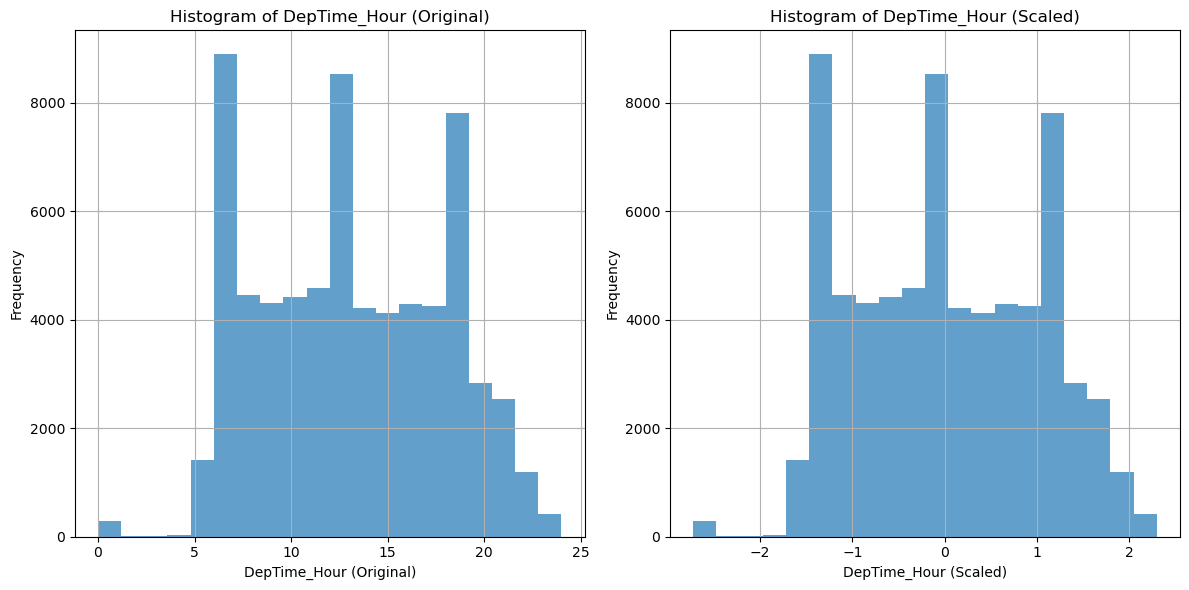

In [46]:
#X['DepTime_Hour'].hist(bins=20)
#在训练线性模型（如线性回归、Lasso 回归、Ridge 回归等）时，特征缩放是非常重要的。
#这是因为不同特征可能具有不同的量级范围，如果不进行缩放，某些特征可能会主导模型的学习过程，从而影响模型性能。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# 创建示例数据
# 绘制原始直方图
plt.figure(figsize=(12, 6))
# 第一个子图 - 原始直方图
plt.subplot(1, 2, 1)
df1['DepTime_Hour'].hist(bins=20, alpha=0.7)
plt.xlabel('DepTime_Hour (Original)')
plt.ylabel('Frequency')
plt.title('Histogram of DepTime_Hour (Original)')

# 特征缩放
scaler = StandardScaler()
df1_scaled = df1.copy()  # 创建一个副本，避免修改原始数据
df1_scaled['DepTime_Hour'] = scaler.fit_transform(df1[['DepTime_Hour']])

# 第二个子图 - 缩放后的直方图
plt.subplot(1, 2, 2)
df1_scaled['DepTime_Hour'].hist(bins=20, alpha=0.7)
plt.xlabel('DepTime_Hour (Scaled)')
plt.ylabel('Frequency')
plt.title('Histogram of DepTime_Hour (Scaled)')

# 显示图形
plt.tight_layout()
plt.show()

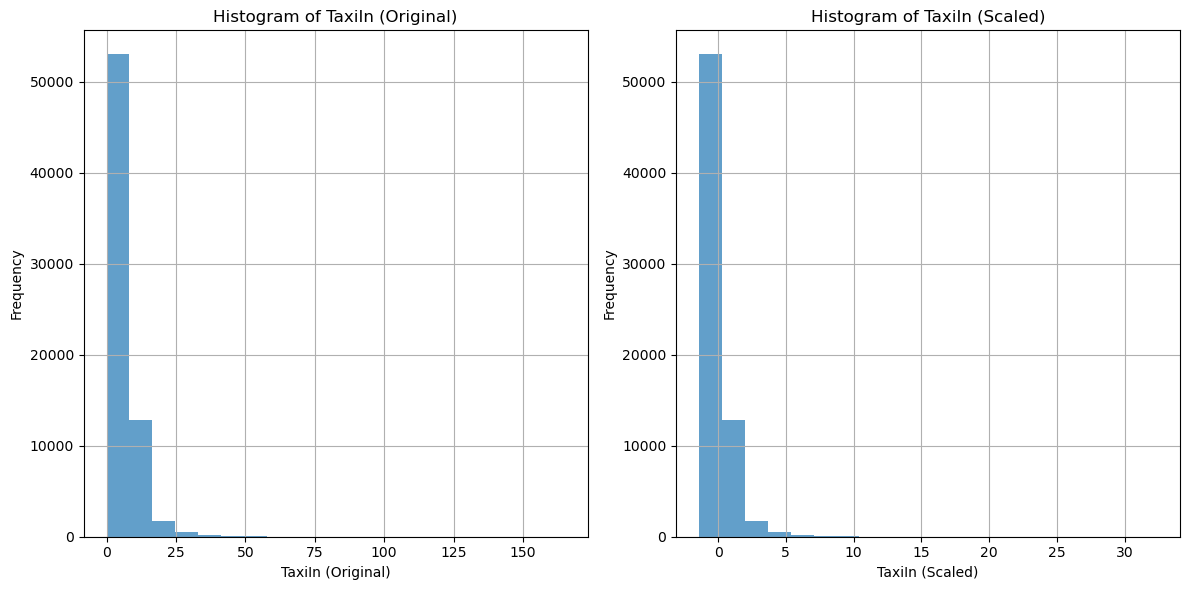

In [48]:
#X['TaxiIn'].hist(bins=20)
# 绘制原始直方图
plt.figure(figsize=(12, 6))

# 第一个子图 - 原始直方图
plt.subplot(1, 2, 1)
df1['TaxiIn'].hist(bins=20, alpha=0.7)
plt.xlabel('TaxiIn (Original)')
plt.ylabel('Frequency')
plt.title('Histogram of TaxiIn (Original)')

# 特征缩放
scaler = StandardScaler()
df1_scaled = df1.copy()  # 创建一个副本，避免修改原始数据
df1_scaled['TaxiIn'] = scaler.fit_transform(df1[['TaxiIn']])

# 第二个子图 - 缩放后的直方图
plt.subplot(1, 2, 2)
df1_scaled['TaxiIn'].hist(bins=20, alpha=0.7)
plt.xlabel('TaxiIn (Scaled)')
plt.ylabel('Frequency')
plt.title('Histogram of TaxiIn (Scaled)')

# 显示图形
plt.tight_layout()
plt.show()

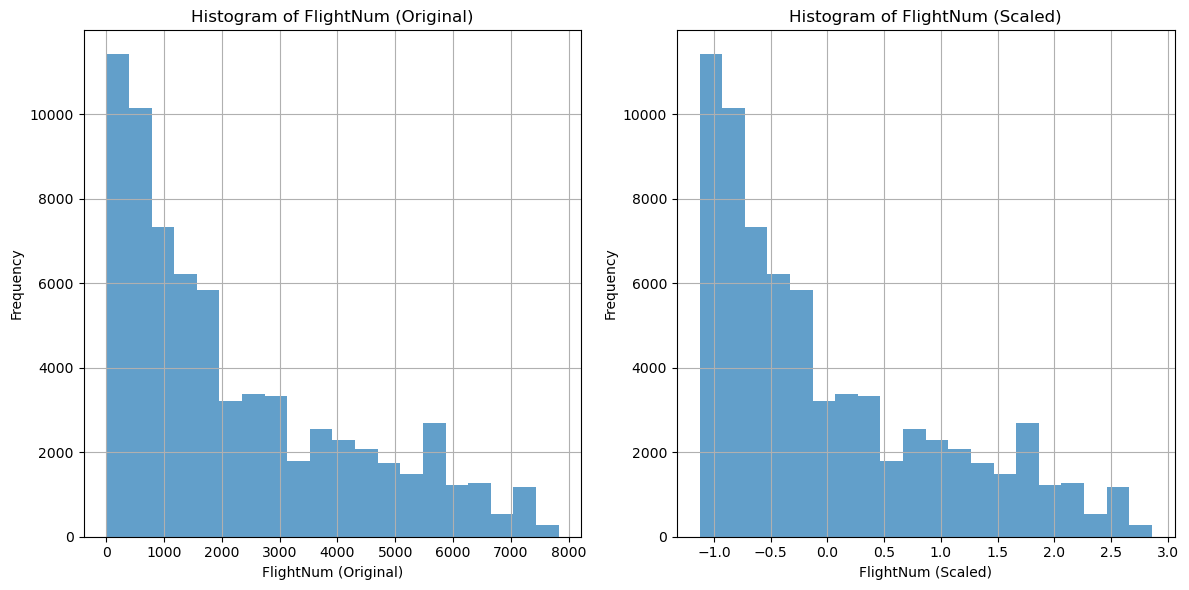

In [50]:
#X['FlightNum'].hist(bins=20)
# 绘制原始直方图
plt.figure(figsize=(12, 6))

# 第一个子图 - 原始直方图
plt.subplot(1, 2, 1)
df1['FlightNum'].hist(bins=20, alpha=0.7)
plt.xlabel('FlightNum (Original)')
plt.ylabel('Frequency')
plt.title('Histogram of FlightNum (Original)')

# 特征缩放
scaler = StandardScaler()
df1_scaled = df1.copy()  # 创建一个副本，避免修改原始数据
df1_scaled['FlightNum'] = scaler.fit_transform(df1[['FlightNum']])

# 第二个子图 - 缩放后的直方图
plt.subplot(1, 2, 2)
df1_scaled['FlightNum'].hist(bins=20, alpha=0.7)
plt.xlabel('FlightNum (Scaled)')
plt.ylabel('Frequency')
plt.title('Histogram of FlightNum (Scaled)')

# 显示图形
plt.tight_layout()
plt.show()

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [110]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def transform_data(df):
    # 分离数值特征和类别特征
    numerical_features = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
    categorical_features = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime_Hour',
    'DepTime_Minute',  
    'CRSDepTime_Hour',
    'CRSDepTime_Minute',  
    'ArrTime_Hour',
    'ArrTime_Minute',  
    'CRSArrTime_Hour',
    'CRSArrTime_Minute' , 'UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest', 'Cancelled', 'CancellationCode', 'Diverted']

    # 替换缺失值
    df[numerical_features] = df[numerical_features].fillna(0)
    df[categorical_features] = df[categorical_features].fillna('nan')

     # 检查是否还有缺失值
    if df.isnull().sum().sum() > 0:
        print("仍有缺失值存在！")
        print(df.isnull().sum())
        raise ValueError("Data still contains NaN values after imputation.")

    # 标准化数值特征
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    # 检查是否还有缺失值
    if df[numerical_features].isnull().sum().sum() > 0:
        print("数值特征仍有缺失值存在！")
        print(df[numerical_features].isnull().sum())
        raise ValueError("Numerical features still contain NaN values after scaling.")

    # One-hot 编码类别特征
    df = pd.get_dummies(df, columns=categorical_features)

    return df


Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [118]:
# Your code here
df_transformed = transform_data(df1)
# 检查 X 是否还有 NaN 值
#if df_transformed.isnull().sum().sum() > 0:
 #   print("仍有缺失值存在！")
  #  print(X.isnull().sum())
#else:
  #  print("所有缺失值已被正确处理。")
print(df_transformed.head())

# 计算转换后的特征数量
num_features = len(df_transformed.columns)

print(f"после преобразования DataFrame имеет {num_features} признаков。")

   ActualElapsedTime  CRSElapsedTime   AirTime  ArrDelay  DepDelay  Distance  \
0          -0.930601       -0.912187 -0.805728  0.002552  0.181158 -0.738324   
1          -0.001271        0.135521  0.096865 -0.157504  0.181158  0.193626   
2           0.192918        0.379508  0.344350 -0.717701 -0.341343  0.481876   
3          -0.306424       -0.251988 -0.325316 -0.530969 -0.370371 -0.340433   
4           0.331624        0.451269  0.504488 -0.664349 -0.428427  0.646338   

     TaxiIn   TaxiOut  CarrierDelay  WeatherDelay  ...  Dest_YKM  Dest_YUM  \
0 -0.748794 -0.709878     -0.180311     -0.073953  ...     False     False   
1 -0.546142 -0.359559     -0.180311     -0.073953  ...     False     False   
2 -0.546142 -0.622298     -0.180311     -0.073953  ...     False     False   
3 -0.546142  0.253500     -0.180311     -0.073953  ...     False     False   
4 -0.546142 -0.709878     -0.180311     -0.073953  ...     False     False   

   Cancelled_0  Cancelled_1  CancellationCode_A  C

**11.** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [120]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 假设目标变量是 'ArrDelay'
target_column = 'ArrDelay'
X = df_transformed.drop(columns=[target_column])
y = df_transformed[target_column]

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("训练集特征形状:", X_train.shape)
print("测试集特征形状:", X_test.shape)
print("训练集标签形状:", y_train.shape)
print("测试集标签形状:", y_test.shape)

训练集特征形状: (49000, 13151)
测试集特征形状: (21000, 13151)
训练集标签形状: (49000,)
测试集标签形状: (21000,)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [124]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 抽取 1000 个对象作为子样本
np.random.seed(42)
subsample_indices = np.random.choice(len(X_train), size=1000, replace=False)
X_subsample = X_train.iloc[subsample_indices]
y_subsample = y_train.iloc[subsample_indices]

# 训练线性回归模型
model = LinearRegression()
model.fit(X_subsample, y_subsample)

# 获取系数
coefficients = model.coef_
print("Coefficients:", coefficients)

# 子样本上的预测
y_subsample_pred = model.predict(X_subsample)
mse_subsample = mean_squared_error(y_subsample, y_subsample_pred)
r2_subsample = r2_score(y_subsample, y_subsample_pred)

# 对照样本上的预测
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE on subsample:", mse_subsample)
print("R² on subsample:", r2_subsample)
print("MSE on test set:", mse_test)
print("R² on test set:", r2_test)

Coefficients: [ 0.36589209 -0.71344253  0.30321804 ... -0.11863822 -0.00659001
  0.00659001]
MSE on subsample: 2.340352147629136e-27
R² on subsample: 1.0
MSE on test set: 0.041921815238168916
R² on test set: 0.9601776670006275


In [ ]:
Модель работала слишком идеально на данных подвыборки, возможно, из-за переобучения.
Несмотря на это, модель по-прежнему обладает хорошей способностью к обобщению на независимом тестовом наборе,
а значения MSE и R² указывают на хорошую прогностическую эффективность модели.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [140]:
# Your code here
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# 设置正则化系数 alpha
alpha = 0.01  # 可以根据实际需求调整

# 训练 Lasso 模型
model = Lasso(alpha=alpha)
model.fit(X_subsample, y_subsample)

# 获取系数
coefficients = model.coef_
print("Coefficients:", coefficients)

# 子样本上的预测
y_subsample_pred = model.predict(X_subsample)
mse_subsample = mean_squared_error(y_subsample, y_subsample_pred)
r2_subsample = r2_score(y_subsample, y_subsample_pred)

# 对照样本上的预测
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE on subsample:", mse_subsample)
print("R² on subsample:", r2_subsample)
print("MSE on test set:", mse_test)
print("R² on test set:", r2_test)


Coefficients: [ 0.02221098 -0.05236276  0.         ... -0.          0.
 -0.        ]
MSE on subsample: 0.042171272529887414
R² on subsample: 0.9532456243641922
MSE on test set: 0.04390012736253101
R² on test set: 0.9582984305280304


**13.** Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.636e+00, tolerance: 9.020e-02
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.367e+00, tolerance: 9.020e-02
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.181e+00, tolerance: 9.020e-02
  model = cd_fast.enet_coo

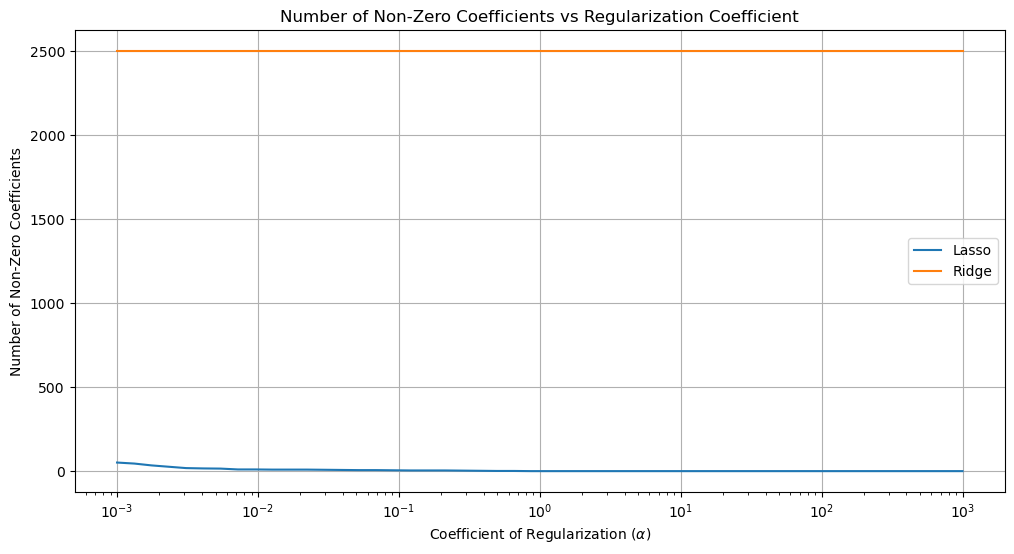

Non-zero coefficients for Lasso:
[51, 45, 34, 26, 18, 16, 15, 10, 10, 9, 9, 9, 8, 7, 6, 6, 5, 4, 4, 4, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Non-zero coefficients for Ridge:
[2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499]


In [146]:
# Your code here
from sklearn.linear_model import Lasso, Ridge

# 定义正则化系数范围
alphas = np.logspace(-3, 3, 50)

# 初始化结果列表
nonzero_coeffs_lasso = []
nonzero_coeffs_ridge = []

# 训练 Lasso 模型并记录非零系数数量
for alpha in alphas:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_subsample, y_subsample)
    nonzero_coeffs_lasso.append(np.sum(model_lasso.coef_ != 0))

# 训练 Ridge 模型并记录非零系数数量
for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_subsample, y_subsample)
    nonzero_coeffs_ridge.append(np.sum(model_ridge.coef_ != 0))

# 绘制非零系数数量随正则化系数变化的图形
plt.figure(figsize=(12, 6))
plt.plot(alphas, nonzero_coeffs_lasso, label='Lasso')
plt.plot(alphas, nonzero_coeffs_ridge, label='Ridge')
plt.xscale('log')  # 使用对数刻度
plt.xlabel('Coefficient of Regularization ($\\alpha$)')
plt.ylabel('Number of Non-Zero Coefficients')
plt.title('Number of Non-Zero Coefficients vs Regularization Coefficient')
plt.legend()
plt.grid(True)
plt.show()

# 输出非零系数数量
print("Non-zero coefficients for Lasso:")
print(nonzero_coeffs_lasso)
print("\nNon-zero coefficients for Ridge:")
print(nonzero_coeffs_ridge)

In [ ]:
Lasso: количество ненулевых коэффициентов быстро уменьшается по мере увеличения коэффициента регуляризации, в конечном итоге приближаясь к 0.
Ridge: количество ненулевых коэффициентов остается практически прежним.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [152]:
# Your code here
# ...
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 特征标准化
scaler = StandardScaler()
X_subsample_scaled = scaler.fit_transform(X_subsample)
X_test_scaled = scaler.transform(X_test)

# 设置正则化系数 alpha
alpha = 0.01  # 可以根据实际需求调整

# 训练 Ridge 模型
model_ridge = Ridge(alpha=alpha, max_iter=10000)
model_ridge.fit(X_subsample_scaled, y_subsample)

# 获取系数
coefficients = model_ridge.coef_
print("Coefficients:", coefficients)

# 子样本上的预测
y_subsample_pred = model_ridge.predict(X_subsample_scaled)
mse_subsample = mean_squared_error(y_subsample, y_subsample_pred)
mae_subsample = mean_absolute_error(y_subsample, y_subsample_pred)
r2_subsample = r2_score(y_subsample, y_subsample_pred)

# 对照样本上的预测
y_test_pred = model_ridge.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE on subsample:", mse_subsample)
print("MAE on subsample:", mae_subsample)
print("R² on subsample:", r2_subsample)
print("MSE on test set:", mse_test)
print("MAE on test set:", mae_test)
print("R² on test set:", r2_test)

Coefficients: [ 0.02373714 -0.00819862  0.00412884 ... -0.00298321  0.01479999
 -0.01479999]
MSE on subsample: 8.181267881680471e-12
MAE on subsample: 1.6280968530130516e-06
R² on subsample: 0.9999999999909296
MSE on test set: 0.316297763264232
MAE on test set: 0.34195126662856057
R² on test set: 0.6995427134033833


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [157]:
# Your code here
# ...
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
# 定义正则化系数范围
alphas = np.logspace(-3, 3, 50)  # 从 0.001 到 1000

# 定义 KFold 交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 网格搜索最佳正则化参数
ridge = Ridge(max_iter=10000)
grid_search = GridSearchCV(ridge, {'alpha': alphas}, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_subsample_scaled, y_subsample)

# 最佳正则化参数
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# 使用最佳正则化参数重新训练模型
model_ridge = Ridge(alpha=best_alpha, max_iter=10000)
model_ridge.fit(X_subsample_scaled, y_subsample)

# 获取系数
coefficients = model_ridge.coef_
print("Coefficients:", coefficients)


Best Alpha: 0.001
Coefficients: [ 0.02373727 -0.0081987   0.00412883 ... -0.00298324  0.01480012
 -0.01480012]


In [158]:
# 子样本上的预测
y_subsample_pred = model_ridge.predict(X_subsample_scaled)
mse_subsample = mean_squared_error(y_subsample, y_subsample_pred)
mae_subsample = mean_absolute_error(y_subsample, y_subsample_pred)
r2_subsample = r2_score(y_subsample, y_subsample_pred)

# 对照样本上的预测
y_test_pred = model_ridge.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE on subsample:", mse_subsample)
print("MAE on subsample:", mae_subsample)
print("R² on subsample:", r2_subsample)
print("MSE on test set:", mse_test)
print("MAE on test set:", mae_test)
print("R² on test set:", r2_test)

MSE on subsample: 8.181564451490667e-14
MAE on subsample: 1.6281093414420925e-07
R² on subsample: 0.9999999999999093
MSE on test set: 0.3162970561474776
MAE on test set: 0.3419511597130903
R² on test set: 0.6995433851070941


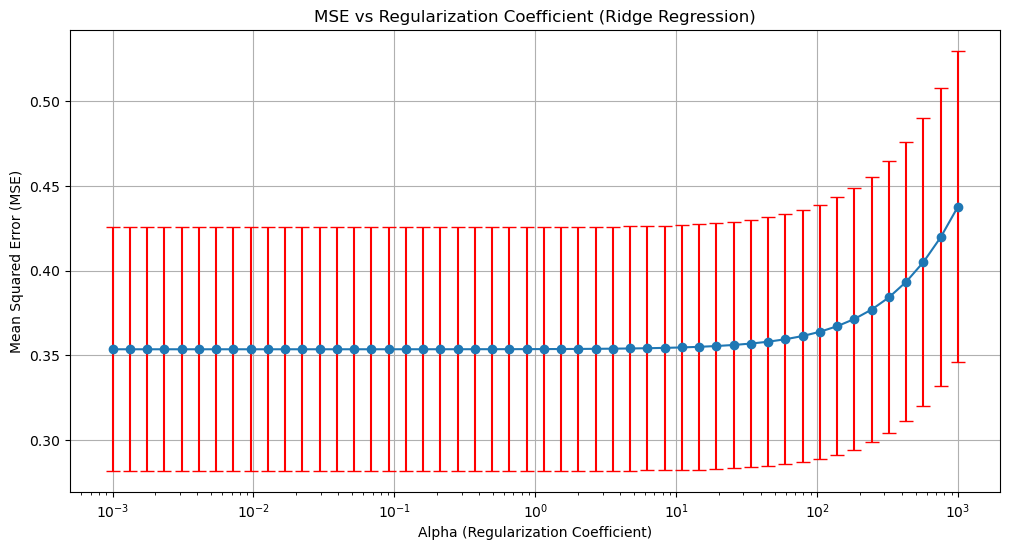

In [159]:
# 绘制损失函数随正则化系数变化的图形
mean_scores = -grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

plt.figure(figsize=(12, 6))
plt.errorbar(alphas, mean_scores, yerr=std_scores, fmt='-o', ecolor='red', capsize=5)
plt.xscale('log')
plt.xlabel('Alpha (Regularization Coefficient)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Regularization Coefficient (Ridge Regression)')
plt.grid(True)
plt.show()

**14.** Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

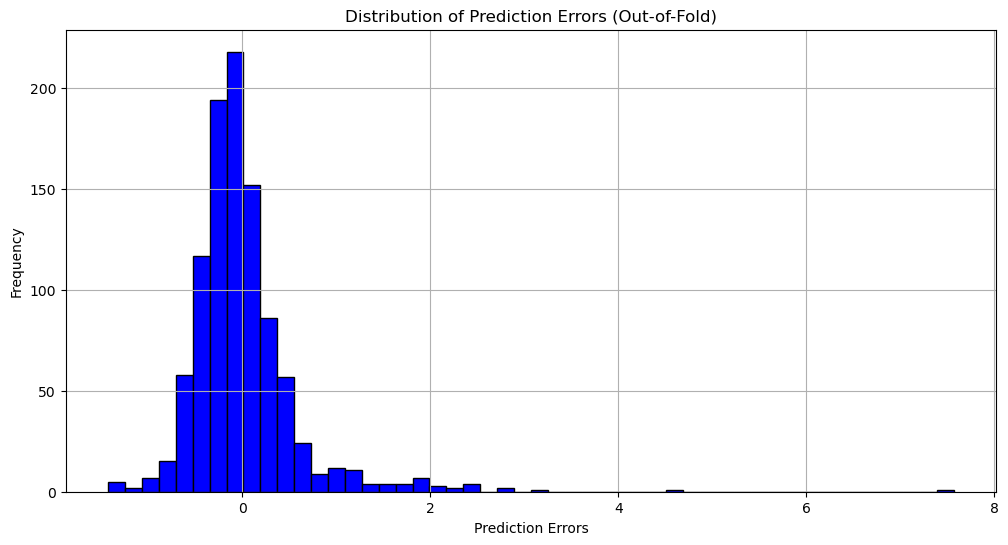

In [166]:
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
# 使用 cross_val_predict 进行 Out-of-Fold 预测
y_subsample_pred = cross_val_predict(model_ridge, X_subsample_scaled, y_subsample, cv=kf)

# 计算预测误差
errors = y_subsample - y_subsample_pred

# 绘制误差分布图
plt.figure(figsize=(12, 6))
plt.hist(errors, bins=50, color='blue', edgecolor='black')
plt.xlabel('Prediction Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors (Out-of-Fold)')
plt.grid(True)
plt.show()